# Start
# Não rodar as células da área (Testes)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neural_network
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [2]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler, StandardScaler

In [3]:
df_train = pd.read_csv(r'public-train.csv')
df_test = pd.read_csv(r'public-test.csv')
df_train = df_train.astype(float)
df_train

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor
0,709.0,0.7,0.2,16.0,12.0,7.0,3.8,0.24,2.3,0.28,1.4,0.20,3.1,0.17,4.7,0.19,2.2,0.21,0.186,0.5,0.147,1.5,0.089,1.6,1.5,2.6,-0.169,0.375
1,921.0,0.6,0.3,19.0,17.0,10.0,3.0,0.12,2.4,0.19,2.0,0.10,2.3,0.27,3.9,0.12,4.6,0.24,0.079,1.2,0.186,1.6,0.076,1.8,0.6,0.4,-0.075,0.234
2,177.0,0.8,0.4,14.0,12.0,5.0,3.2,0.17,1.8,0.18,2.5,0.24,1.8,0.28,4.4,0.24,3.9,0.28,0.036,1.4,0.048,0.7,0.073,0.6,2.7,0.3,-0.177,0.389
3,415.0,0.7,0.5,24.0,11.0,2.0,1.3,0.17,1.5,0.18,3.1,0.16,3.6,0.16,2.6,0.11,4.9,0.20,0.063,1.1,0.151,0.8,0.022,1.1,0.5,0.1,-0.102,0.358
4,802.0,0.8,0.4,21.0,10.0,3.0,4.4,0.15,2.6,0.13,2.2,0.28,1.4,0.26,4.3,0.24,2.4,0.24,0.044,1.9,0.123,1.9,0.046,1.1,2.0,0.6,-0.034,0.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,866.0,0.7,0.5,30.0,12.0,9.0,4.7,0.16,1.0,0.20,4.9,0.10,1.7,0.16,3.1,0.29,5.0,0.27,0.036,1.6,0.163,1.1,0.036,1.2,1.1,2.4,-0.192,0.432
11936,258.0,0.8,0.4,10.0,30.0,10.0,1.6,0.16,4.6,0.14,1.1,0.17,4.0,0.25,1.5,0.17,3.9,0.20,0.018,1.6,0.139,0.6,0.031,1.8,1.7,1.3,-0.322,0.398
11937,629.0,0.5,0.3,17.0,10.0,10.0,4.3,0.26,1.3,0.16,3.2,0.14,2.1,0.29,4.1,0.29,4.0,0.19,0.032,1.0,0.107,1.6,0.013,1.6,1.8,2.8,-0.247,0.491
11938,961.0,0.7,0.3,26.0,16.0,3.0,4.7,0.27,4.5,0.19,2.7,0.17,1.1,0.16,1.6,0.11,4.7,0.17,0.037,1.5,0.165,0.6,0.100,1.6,1.9,0.6,-0.319,0.348


In [4]:
df_train['cent_price_cor'].describe()

count    11940.000000
mean        -0.202591
std          0.116617
min         -0.613000
25%         -0.284000
50%         -0.205000
75%         -0.122000
max          0.266000
Name: cent_price_cor, dtype: float64

In [5]:
df_train['cent_trans_cor'].describe()

count    11940.000000
mean         0.362586
std          0.115221
min         -0.399000
25%          0.294000
50%          0.372000
75%          0.443000
max          0.717000
Name: cent_trans_cor, dtype: float64

# (Testes) Preprocessing before Split the Data

In [ ]:
# Fonte: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [ ]:
df_train = df_train[['n', 'p', 'f', 'x', 'y', 'z', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'l1', 'l3', 'g1', 'e1', 'cent_price_cor', 'cent_trans_cor']]

label_1 = df_train.pop('cent_price_cor')
label_2 = df_train.pop('cent_trans_cor')

df_train = df_train.iloc[:,1:-1]
label_encoder = LabelEncoder()
df_train.iloc[:,0] = label_encoder.fit_transform(df_train.iloc[:,0]).astype('float64')

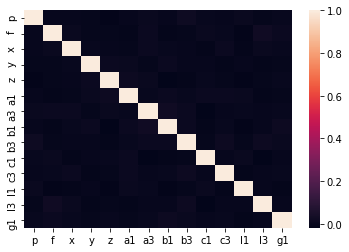

In [ ]:
corr = df_train.corr()
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = df_train.columns[columns]
df_train = df_train[selected_columns]
df_train

,p,f,x,y,z,a1,a3,b1,b3,c1,c3,l1,l3,g1
0,2.0,0.2,16,12,7,3.8,2.3,1.4,3.1,4.7,2.2,0.147,0.089,0.186
1,1.0,0.3,19,17,10,3.0,2.4,2.0,2.3,3.9,4.6,0.186,0.076,0.079
2,3.0,0.4,14,12,5,3.2,1.8,2.5,1.8,4.4,3.9,0.048,0.073,0.036
3,2.0,0.5,24,11,2,1.3,1.5,3.1,3.6,2.6,4.9,0.151,0.022,0.063
4,3.0,0.4,21,10,3,4.4,2.6,2.2,1.4,4.3,2.4,0.123,0.046,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,2.0,0.5,30,12,9,4.7,1.0,4.9,1.7,3.1,5.0,0.163,0.036,0.036
11936,3.0,0.4,10,30,10,1.6,4.6,1.1,4.0,1.5,3.9,0.139,0.031,0.018
11937,0.0,0.3,17,10,10,4.3,1.3,3.2,2.1,4.1,4.0,0.107,0.013,0.032
11938,2.0,0.3,26,16,3,4.7,4.5,2.7,1.1,1.6,4.7,0.165,0.100,0.037


In [ ]:
# selected_columns = selected_columns[:25].values
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
df_train_modeled, selected_columns = backwardElimination(df_train.iloc[:,0:].values, label_1.values, SL, selected_columns)

In [ ]:
# result = pd.DataFrame()
# result['cent_price_cor'] = df_train.iloc[:,0]
df_train = pd.DataFrame(data = df_train_modeled, columns = selected_columns)
df_train

,p,f,x,y,z,a1,a3,b1,b3,c1,c3,l1,l3,g1
0,2.0,0.2,16.0,12.0,7.0,3.8,2.3,1.4,3.1,4.7,2.2,0.147,0.089,0.186
1,1.0,0.3,19.0,17.0,10.0,3.0,2.4,2.0,2.3,3.9,4.6,0.186,0.076,0.079
2,3.0,0.4,14.0,12.0,5.0,3.2,1.8,2.5,1.8,4.4,3.9,0.048,0.073,0.036
3,2.0,0.5,24.0,11.0,2.0,1.3,1.5,3.1,3.6,2.6,4.9,0.151,0.022,0.063
4,3.0,0.4,21.0,10.0,3.0,4.4,2.6,2.2,1.4,4.3,2.4,0.123,0.046,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,2.0,0.5,30.0,12.0,9.0,4.7,1.0,4.9,1.7,3.1,5.0,0.163,0.036,0.036
11936,3.0,0.4,10.0,30.0,10.0,1.6,4.6,1.1,4.0,1.5,3.9,0.139,0.031,0.018
11937,0.0,0.3,17.0,10.0,10.0,4.3,1.3,3.2,2.1,4.1,4.0,0.107,0.013,0.032
11938,2.0,0.3,26.0,16.0,3.0,4.7,4.5,2.7,1.1,1.6,4.7,0.165,0.100,0.037


In [ ]:
df_train['cent_price_cor'] = label_1
df_train['cent_trans_cor'] = label_2
df_train

,p,f,x,y,z,a1,a3,b1,b3,c1,c3,l1,l3,g1,cent_price_cor,cent_trans_cor
0,2.0,0.2,16.0,12.0,7.0,3.8,2.3,1.4,3.1,4.7,2.2,0.147,0.089,0.186,-0.169,0.375
1,1.0,0.3,19.0,17.0,10.0,3.0,2.4,2.0,2.3,3.9,4.6,0.186,0.076,0.079,-0.075,0.234
2,3.0,0.4,14.0,12.0,5.0,3.2,1.8,2.5,1.8,4.4,3.9,0.048,0.073,0.036,-0.177,0.389
3,2.0,0.5,24.0,11.0,2.0,1.3,1.5,3.1,3.6,2.6,4.9,0.151,0.022,0.063,-0.102,0.358
4,3.0,0.4,21.0,10.0,3.0,4.4,2.6,2.2,1.4,4.3,2.4,0.123,0.046,0.044,-0.034,0.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,2.0,0.5,30.0,12.0,9.0,4.7,1.0,4.9,1.7,3.1,5.0,0.163,0.036,0.036,-0.192,0.432
11936,3.0,0.4,10.0,30.0,10.0,1.6,4.6,1.1,4.0,1.5,3.9,0.139,0.031,0.018,-0.322,0.398
11937,0.0,0.3,17.0,10.0,10.0,4.3,1.3,3.2,2.1,4.1,4.0,0.107,0.013,0.032,-0.247,0.491
11938,2.0,0.3,26.0,16.0,3.0,4.7,4.5,2.7,1.1,1.6,4.7,0.165,0.100,0.037,-0.319,0.348


# (Testes) Looking for correlation between features

In [ ]:
df_train['volume'] = df_train['n'] / (df_train['x'] * df_train['y'] * pow(df_train['z'],2))
df_train['agressividade'] = df_train['f'] + df_train['g1']

df_train['d1_trans'] = df_train['a1'] + df_train['a3']
df_train['d2_trans'] = df_train['b1'] + df_train['b3']
df_train['d3_trans'] = df_train['c1'] + df_train['c3']
df_train['d4_trans'] = df_train['l1'] + df_train['l3']

df_train['d1_price'] = (df_train['a1'] + df_train['a3']) / (df_train['e2'] + df_train['e1'])
df_train['d2_price'] = df_train['b1'] * df_train['b3']
df_train['d3_price'] = df_train['c1'] * df_train['c3']
df_train['d4_price'] = df_train['l1'] - df_train['l3']
df_train['d5_price'] = df_train['e2'] + df_train['e1']

df_train

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor,volume,agressividade,d1_trans,d2_trans,d3_trans,d4_trans,d1_price,d2_price,d3_price,d4_price,d5_price
0,709.0,0.7,0.2,16.0,12.0,7.0,3.8,0.24,2.3,0.28,1.4,0.20,3.1,0.17,4.7,0.19,2.2,0.21,0.186,0.5,0.147,1.5,0.089,1.6,1.5,2.6,-0.169,0.375,0.075361,0.386,6.1,4.5,6.9,0.236,1.487805,4.34,10.34,0.058,4.1
1,921.0,0.6,0.3,19.0,17.0,10.0,3.0,0.12,2.4,0.19,2.0,0.10,2.3,0.27,3.9,0.12,4.6,0.24,0.079,1.2,0.186,1.6,0.076,1.8,0.6,0.4,-0.075,0.234,0.028514,0.379,5.4,4.3,8.5,0.262,5.400000,4.60,17.94,0.110,1.0
2,177.0,0.8,0.4,14.0,12.0,5.0,3.2,0.17,1.8,0.18,2.5,0.24,1.8,0.28,4.4,0.24,3.9,0.28,0.036,1.4,0.048,0.7,0.073,0.6,2.7,0.3,-0.177,0.389,0.042143,0.436,5.0,4.3,8.3,0.121,1.666667,4.50,17.16,-0.025,3.0
3,415.0,0.7,0.5,24.0,11.0,2.0,1.3,0.17,1.5,0.18,3.1,0.16,3.6,0.16,2.6,0.11,4.9,0.20,0.063,1.1,0.151,0.8,0.022,1.1,0.5,0.1,-0.102,0.358,0.392992,0.563,2.8,6.7,7.5,0.173,4.666667,11.16,12.74,0.129,0.6
4,802.0,0.8,0.4,21.0,10.0,3.0,4.4,0.15,2.6,0.13,2.2,0.28,1.4,0.26,4.3,0.24,2.4,0.24,0.044,1.9,0.123,1.9,0.046,1.1,2.0,0.6,-0.034,0.180,0.424339,0.444,7.0,3.6,6.7,0.169,2.692308,3.08,10.32,0.077,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,866.0,0.7,0.5,30.0,12.0,9.0,4.7,0.16,1.0,0.20,4.9,0.10,1.7,0.16,3.1,0.29,5.0,0.27,0.036,1.6,0.163,1.1,0.036,1.2,1.1,2.4,-0.192,0.432,0.029698,0.536,5.7,6.6,8.1,0.199,1.628571,8.33,15.50,0.127,3.5
11936,258.0,0.8,0.4,10.0,30.0,10.0,1.6,0.16,4.6,0.14,1.1,0.17,4.0,0.25,1.5,0.17,3.9,0.20,0.018,1.6,0.139,0.6,0.031,1.8,1.7,1.3,-0.322,0.398,0.008600,0.418,6.2,5.1,5.4,0.170,2.066667,4.40,5.85,0.108,3.0
11937,629.0,0.5,0.3,17.0,10.0,10.0,4.3,0.26,1.3,0.16,3.2,0.14,2.1,0.29,4.1,0.29,4.0,0.19,0.032,1.0,0.107,1.6,0.013,1.6,1.8,2.8,-0.247,0.491,0.037000,0.332,5.6,5.3,8.1,0.120,1.217391,6.72,16.40,0.094,4.6
11938,961.0,0.7,0.3,26.0,16.0,3.0,4.7,0.27,4.5,0.19,2.7,0.17,1.1,0.16,1.6,0.11,4.7,0.17,0.037,1.5,0.165,0.6,0.100,1.6,1.9,0.6,-0.319,0.348,0.256677,0.337,9.2,3.8,6.3,0.265,3.680000,2.97,7.52,0.065,2.5


# (Testes) My Normalization

In [ ]:

normal_vars = ['a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'g1', 'l1', 'l3']
normal_vars_std = ['a2', 'a4', 'b2', 'b4', 'c2', 'c4', 'g2', 'l2', 'l4']
for j, tipo in enumerate(normal_vars):
  media = df_train[tipo].mean()
  for i in range(len(df_train[tipo])):
    df_train[tipo][i] = (df_train[tipo][i] - media) / df_train[normal_vars_std[j]][i] # 

# minmax_vars = ['n', 'z', 'g1', 'l1', 'l3', 'x', 'y', 'p', 'f']
# for j, tipo in enumerate(minmax_vars):
#   minimo = df_train[tipo].min()
#   maximo = df_train[tipo].max()
#   for i in range(len(df_train[tipo])):
#     df_train[tipo][i] = (df_train[tipo][i] - minimo) / (maximo - minimo)

df_train

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor,volume,agressividade,d1_trans,d2_trans,d3_trans,d4_trans,d1_price,d2_price,d3_price,d4_price,d5_price
0,709.0,0.7,0.2,16.0,12.0,7.0,3.299798,0.24,-2.462760,0.28,-8.033836,0.20,0.626466,0.17,8.916116,0.19,-3.872856,0.21,0.171156,0.5,0.031320,1.5,0.024420,1.6,1.5,2.6,-0.169,0.375,0.075361,0.386,6.1,4.5,6.9,0.236,1.487805,4.34,10.34,0.058,4.1
1,921.0,0.6,0.3,19.0,17.0,10.0,-0.067071,0.12,-3.103015,0.19,-10.067672,0.10,-2.568522,0.27,7.450516,0.12,6.611251,0.24,-0.017852,1.2,0.053738,1.6,0.014484,1.8,0.6,0.4,-0.075,0.234,0.028514,0.379,5.4,4.3,8.5,0.262,5.400000,4.60,17.94,0.110,1.0
2,177.0,0.8,0.4,14.0,12.0,5.0,1.129126,0.17,-6.608738,0.18,-2.111530,0.24,-4.262503,0.28,5.808592,0.24,3.166786,0.28,-0.046016,1.4,-0.074314,0.7,0.038453,0.6,2.7,0.3,-0.177,0.389,0.042143,0.436,5.0,4.3,8.3,0.121,1.666667,4.50,17.16,-0.025,3.0
3,415.0,0.7,0.5,24.0,11.0,2.0,-10.047345,0.17,-8.275405,0.18,0.582705,0.16,3.790620,0.16,-3.690346,0.11,9.433501,0.20,-0.034020,1.1,0.063725,0.8,-0.025389,1.1,0.5,0.1,-0.102,0.358,0.392992,0.563,2.8,6.7,7.5,0.173,4.666667,11.16,12.74,0.129,0.6
4,802.0,0.8,0.4,21.0,10.0,3.0,9.279676,0.15,-2.996714,0.13,-2.881311,0.28,-6.128849,0.26,5.391925,0.24,-2.555416,0.24,-0.029696,1.9,0.012095,1.9,-0.003571,1.1,2.0,0.6,-0.034,0.180,0.424339,0.444,7.0,3.6,6.7,0.169,2.692308,3.08,10.32,0.077,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,866.0,0.7,0.5,30.0,12.0,9.0,10.574696,0.16,-9.947864,0.20,18.932328,0.10,-8.084380,0.16,0.324352,0.29,7.358149,0.27,-0.040264,1.6,0.057255,1.1,-0.011607,1.2,1.1,2.4,-0.192,0.432,0.029698,0.536,5.7,6.6,8.1,0.199,1.628571,8.33,15.50,0.127,3.5
11936,258.0,0.8,0.4,10.0,30.0,10.0,-8.800304,0.16,11.503051,0.14,-11.216277,0.17,4.025997,0.25,-8.858459,0.17,4.433501,0.20,-0.051514,1.6,0.064967,0.6,-0.010516,1.8,1.7,1.3,-0.322,0.398,0.008600,0.418,6.2,5.1,5.4,0.170,2.066667,4.40,5.85,0.108,3.0
11937,629.0,0.5,0.3,17.0,10.0,10.0,4.969044,0.26,-10.559830,0.16,1.380235,0.14,-3.081037,0.29,3.772628,0.29,5.193159,0.19,-0.068422,1.0,0.004363,1.6,-0.023080,1.6,1.8,2.8,-0.247,0.491,0.037000,0.332,5.6,5.3,8.1,0.120,1.217391,6.72,16.40,0.094,4.6
11938,961.0,0.7,0.3,26.0,16.0,3.0,6.266487,0.27,7.949617,0.19,-1.804513,0.17,-11.834380,0.16,-12.781255,0.11,9.921766,0.17,-0.042281,1.5,0.108300,0.6,0.031295,1.6,1.9,0.6,-0.319,0.348,0.256677,0.337,9.2,3.8,6.3,0.265,3.680000,2.97,7.52,0.065,2.5


# (Testes) Splitting and Visualizing the Data

In [ ]:
train_set, validation_set = train_test_split(df_train, test_size=0.3)

In [ ]:
y_train_price = train_set.pop('cent_price_cor')
y_train_trans = train_set.pop('cent_trans_cor')

y_validation_price = validation_set.pop('cent_price_cor')
y_validation_trans = validation_set.pop('cent_trans_cor')

index = df_test.pop('id')

In [ ]:
print(df_train.shape)
print(train_set.shape)
print(validation_set.shape)

(11940, 28)
(7761, 26)
(4179, 26)


In [ ]:
df_train.describe()

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor
count,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000
mean,0.498717,0.501717,0.500586,0.496478,0.498635,0.495347,0.016745,0.200654,-0.012008,0.199744,-0.020057,0.200666,0.000438,0.201355,0.000232,0.199647,0.003122,0.200454,0.502111,1.255310,0.500099,1.252814,0.499281,1.252152,-0.000997,1.552647,-0.202591,0.362586
std,0.287047,0.306604,0.319796,0.303859,0.304477,0.319374,6.691326,0.057774,6.712257,0.058152,6.598590,0.057999,6.617604,0.058083,6.688974,0.058393,6.708952,0.058065,0.288644,0.435027,0.290357,0.435154,0.286663,0.434480,1.679658,0.845237,0.116617,0.115221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.080486,0.100000,-19.895729,0.100000,-20.067672,0.100000,-19.935008,0.100000,-20.059380,0.100000,-20.132998,0.100000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,-14.479313,0.100000,-0.613000,-0.399000
25%,0.246667,0.250000,0.333333,0.250000,0.250000,0.222222,-5.030956,0.150000,-4.959896,0.150000,-5.024168,0.150000,-4.963894,0.150000,-5.026991,0.150000,-5.060454,0.150000,0.255000,0.900000,0.245000,0.900000,0.250000,0.900000,-0.462197,0.800000,-0.284000,0.294000
50%,0.501111,0.500000,0.666667,0.500000,0.500000,0.444444,-0.036584,0.200000,0.038619,0.200000,-0.030760,0.200000,0.029542,0.200000,-0.024742,0.200000,-0.049259,0.200000,0.500000,1.300000,0.505000,1.300000,0.500000,1.300000,-0.016528,1.600000,-0.205000,0.372000
75%,0.744444,0.750000,0.666667,0.750000,0.750000,0.777778,4.959757,0.250000,5.037956,0.250000,4.962405,0.250000,5.023211,0.250000,4.970310,0.250000,5.126552,0.250000,0.755000,1.600000,0.755000,1.600000,0.750000,1.600000,0.466231,2.300000,-0.122000,0.443000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.919514,0.300000,20.104271,0.300000,18.932328,0.300000,20.064992,0.300000,19.940620,0.300000,19.867002,0.300000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,13.520687,3.000000,0.266000,0.717000


In [ ]:
'''
MinMax / uniform = n, z, g1, l1, l3
almost uniforme (except the end) = x, y
normal = p, f

a1 = a3 = b1 = b3 = c1 = c3
a2 = a4 = b2 = b4 = c2 = c4
g2, l2, l4 (or uniform)
e1, e2
'''

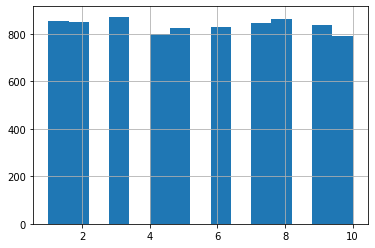

In [ ]:
train_set.z.hist(bins=15) # MinMax
#train_set.n.hist(bins=20) # MinMax

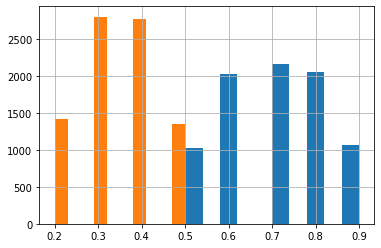

In [ ]:
train_set.p.hist(bins=10) # normal
train_set.f.hist(bins=10) # normal

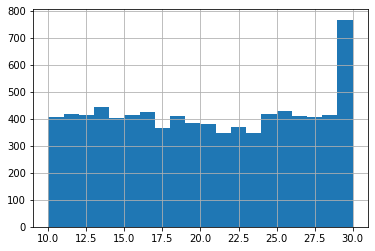

In [ ]:
train_set.x.hist(bins=20) # uniform

# Seting Another Feature and Fitting

In [12]:
from numpy import random

test = random.uniform(0, len(df_train), size=len(df_train))
test.sort()
df_train['random'] = test
df_train

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor,random
0,709.0,0.7,0.2,16.0,12.0,7.0,3.8,0.24,2.3,0.28,1.4,0.20,3.1,0.17,4.7,0.19,2.2,0.21,0.186,0.5,0.147,1.5,0.089,1.6,1.5,2.6,-0.169,0.375,0.097999
1,921.0,0.6,0.3,19.0,17.0,10.0,3.0,0.12,2.4,0.19,2.0,0.10,2.3,0.27,3.9,0.12,4.6,0.24,0.079,1.2,0.186,1.6,0.076,1.8,0.6,0.4,-0.075,0.234,0.150868
2,177.0,0.8,0.4,14.0,12.0,5.0,3.2,0.17,1.8,0.18,2.5,0.24,1.8,0.28,4.4,0.24,3.9,0.28,0.036,1.4,0.048,0.7,0.073,0.6,2.7,0.3,-0.177,0.389,0.428405
3,415.0,0.7,0.5,24.0,11.0,2.0,1.3,0.17,1.5,0.18,3.1,0.16,3.6,0.16,2.6,0.11,4.9,0.20,0.063,1.1,0.151,0.8,0.022,1.1,0.5,0.1,-0.102,0.358,0.774513
4,802.0,0.8,0.4,21.0,10.0,3.0,4.4,0.15,2.6,0.13,2.2,0.28,1.4,0.26,4.3,0.24,2.4,0.24,0.044,1.9,0.123,1.9,0.046,1.1,2.0,0.6,-0.034,0.180,2.565649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,866.0,0.7,0.5,30.0,12.0,9.0,4.7,0.16,1.0,0.20,4.9,0.10,1.7,0.16,3.1,0.29,5.0,0.27,0.036,1.6,0.163,1.1,0.036,1.2,1.1,2.4,-0.192,0.432,11936.788394
11936,258.0,0.8,0.4,10.0,30.0,10.0,1.6,0.16,4.6,0.14,1.1,0.17,4.0,0.25,1.5,0.17,3.9,0.20,0.018,1.6,0.139,0.6,0.031,1.8,1.7,1.3,-0.322,0.398,11937.322473
11937,629.0,0.5,0.3,17.0,10.0,10.0,4.3,0.26,1.3,0.16,3.2,0.14,2.1,0.29,4.1,0.29,4.0,0.19,0.032,1.0,0.107,1.6,0.013,1.6,1.8,2.8,-0.247,0.491,11939.058986
11938,961.0,0.7,0.3,26.0,16.0,3.0,4.7,0.27,4.5,0.19,2.7,0.17,1.1,0.16,1.6,0.11,4.7,0.17,0.037,1.5,0.165,0.6,0.100,1.6,1.9,0.6,-0.319,0.348,11939.281693


In [13]:
train_set, validation_set = train_test_split(df_train, test_size=0.3)
y_train_price = train_set.pop('cent_price_cor')
y_train_trans = train_set.pop('cent_trans_cor')
y_validation_price = validation_set.pop('cent_price_cor')
y_validation_trans = validation_set.pop('cent_trans_cor')

minmax_vars_random = ['random']
train_minmax = train_set[minmax_vars_random]
validation_minmax = validation_set[minmax_vars_random]

model_price = LinearRegression()
model_trans = LinearRegression()

result_price = model_price.fit(train_minmax, y_train_price)
result_trans = model_trans.fit(train_minmax, y_train_trans)
predict_validation_price = result_price.predict(validation_minmax)
predict_validation_trans = result_trans.predict(validation_minmax)
print('\nPredict test set price: ' + str(mean_absolute_error(y_validation_price.values, predict_validation_price)))
print('Predict test set trans: ' + str(mean_absolute_error(y_validation_trans.values, predict_validation_trans)))
print('\nChallenge Possible Score: ' +
      str(mean_absolute_error(y_validation_price.values, predict_validation_price) +
          mean_absolute_error(y_validation_trans.values, predict_validation_trans)))


Predict test set price: 0.08835191180504116
Predict test set trans: 0.08634888721108729

Challenge Possible Score: 0.17470079901612845


# (Testes) Initial Model

In [ ]:
# MinMax Normalization
# minmax_vars = ['n', 'p', 'f', 'x', 'y', 'z', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'l1', 'l3', 'g1', 'e1']
minmax_vars = ['p', 'f', 'volume', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'l1', 'l3', 'g1', 'e1']

train_minmax = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(train_set[minmax_vars])
train_minmax = train_minmax.transform(train_set[minmax_vars])

validation_minmax = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(validation_set[minmax_vars])
validation_minmax = validation_minmax.transform(validation_set[minmax_vars])

# test_minmax = preprocessing.MinMaxScaler().fit(df_test[minmax_vars])
# test_minmax = test_minmax.transform(df_test[minmax_vars])

In [ ]:
train_set, validation_set = train_test_split(df_train, test_size=0.3)

y_train_price = train_set.pop('cent_price_cor')
y_train_trans = train_set.pop('cent_trans_cor')

y_validation_price = validation_set.pop('cent_price_cor')
y_validation_trans = validation_set.pop('cent_trans_cor')

In [ ]:
# minmax_vars = ['p','volume','agressividade','d1_trans','d2_trans','d4_trans']
minmax_vars = ['agressividade','d1_price','d2_price','d4_price']

train_minmax = train_set[minmax_vars]
validation_minmax = validation_set[minmax_vars]

## Training

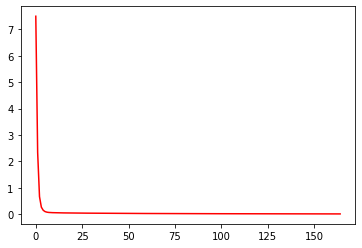

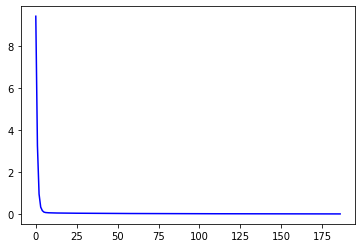

In [ ]:
# neural_network.MLPRegressor(hidden_layer_sizes=(20), random_state=1, max_iter=500, alpha=3)
# AdaBoostRegressor()
# LinearRegression()

model_price = neural_network.MLPRegressor(hidden_layer_sizes=(20), random_state=1, max_iter=500, alpha=3)
model_trans = neural_network.MLPRegressor(hidden_layer_sizes=(20), random_state=1, max_iter=500, alpha=3)

result_price = model_price.fit(train_minmax, y_train_price)
result_trans = model_trans.fit(train_minmax, y_train_trans)

plt.plot(result_price.loss_curve_, 'r')
plt.figure()
plt.plot(result_trans.loss_curve_, 'b')

## Results and Metrics

In [ ]:
# Prediction training set

predict_train_price = result_price.predict(train_minmax)
predict_train_trans = result_trans.predict(train_minmax)
print('Predict train set price: ' + str(mean_absolute_error(y_train_price.values, predict_train_price)))
print('Predict train set trans: ' + str(mean_absolute_error(y_train_trans.values, predict_train_trans)))

# Prediction test set

predict_validation_price = result_price.predict(validation_minmax)
predict_validation_trans = result_trans.predict(validation_minmax)
print('\nPredict test set price: ' + str(mean_absolute_error(y_validation_price.values, predict_validation_price)))
print('Predict test set trans: ' + str(mean_absolute_error(y_validation_trans.values, predict_validation_trans)))

# Challenge Possible Score
print('\nChallenge Possible Score: ' +
      str(mean_absolute_error(y_validation_price.values, predict_validation_price) +
          mean_absolute_error(y_validation_trans.values, predict_validation_trans)))

Predict train set price: 0.09340342161707281
Predict train set trans: 0.09028333604216572

Predict test set price: 0.09497739655646747
Predict test set trans: 0.09201787392867074

Challenge Possible Score: 0.1869952704851382


# (Testes) Tuning the features


In [ ]:
all = ['volume','agressividade','d1_trans','d2_trans','d4_trans', 'd5_price','n', 'p', 'f', 'x', 'y', 'z', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'l1', 'l3', 'g1', 'e1']
all2 = ['agressividade','d1_trans','d2_trans','d4_trans', 'd5_price','n', 'p', 'f', 'x', 'y', 'z', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'l1', 'l3', 'g1', 'e1']
all3 = ['d1_trans','d2_trans','d4_trans', 'd5_price','n', 'p', 'f', 'x', 'y', 'z', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'l1', 'l3', 'g1', 'e1']

for i, tipo1 in enumerate(all):
  for j, tipo2 in enumerate(all2):
    for k, tipo3 in enumerate(all3):
      l1 = []
      l2 = []
      l3 = []
      for epocas in range(4):
        train_set, validation_set = train_test_split(df_train, test_size=0.3)
        y_train_price = train_set.pop('cent_price_cor')
        y_train_trans = train_set.pop('cent_trans_cor')
        y_validation_price = validation_set.pop('cent_price_cor')
        y_validation_trans = validation_set.pop('cent_trans_cor')

        # minmax_vars = ['p','volume','agressividade','d1_trans','d2_trans','d4_trans']
        minmax_vars = [tipo1,tipo2,tipo3]
        train_minmax = train_set[minmax_vars]
        validation_minmax = validation_set[minmax_vars]

        model_price = LinearRegression()
        model_trans = LinearRegression()
        result_price = model_price.fit(train_minmax, y_train_price)
        result_trans = model_trans.fit(train_minmax, y_train_trans)
        predict_validation_price = result_price.predict(validation_minmax)
        predict_validation_trans = result_trans.predict(validation_minmax)
        l1.append(mean_absolute_error(y_validation_price.values, predict_validation_price))
        l2.append(mean_absolute_error(y_validation_trans.values, predict_validation_trans))
        l3.append(mean_absolute_error(y_validation_price.values, predict_validation_price) + mean_absolute_error(y_validation_trans.values, predict_validation_trans))
      if (np.array(l1).mean() < 0.093):
        print('\nPredict test set price: ' + str(np.array(l1).mean()))
        print('Predict test set trans: ' + str(np.array(l2).mean()))
        print('Challenge Possible Score: ' + str(minmax_vars))



Predict test set price: 0.0922025433181155
Predict test set trans: 0.08901534030610653
Challenge Possible Score: ['agressividade']

Predict test set price: 0.09290620221971278
Predict test set trans: 0.08999968222394869
Challenge Possible Score: ['y']

Predict test set price: 0.09265159433535365
Predict test set trans: 0.09004545219101995
Challenge Possible Score: ['b1']

Predict test set price: 0.09291689430151458
Predict test set trans: 0.08991092486553522
Challenge Possible Score: ['e1']


In [ ]:
train_set, validation_set = train_test_split(df_train, test_size=0.3)
#
total = 0
# for i in train_set.index:
#   if (train_set['cent_trans_cor'][i] < (0.362586 + 0.115221)) and (train_set['cent_trans_cor'][i] > (0.362586 - 0.115221)):
#     if total < 4858:
#       train_set = train_set.drop(i)
#       total += 1

# for i in train_set.index:
#   if (train_set['cent_price_cor'][i] < (-0.202591 + 0.116617)) and (train_set['cent_price_cor'][i] > (-0.202591 - 0.116617)): #if total < 3658:
#     train_set = train_set.drop(i)
#     total += 1
    
#
y_train_price = train_set.pop('cent_price_cor')
y_train_trans = train_set.pop('cent_trans_cor')
y_validation_price = validation_set.pop('cent_price_cor')
y_validation_trans = validation_set.pop('cent_trans_cor')

# minmax_vars = ['p','volume','agressividade','d1_trans','d2_trans','d4_trans','d5_price']
minmax_vars = ['p','volume','agressividade','d1_trans','d2_trans','d4_price']
train_minmax = train_set[minmax_vars]
validation_minmax = validation_set[minmax_vars]

model_price = LinearRegression()
model_trans = LinearRegression()
result_price = model_price.fit(train_minmax, y_train_price)
result_trans = model_trans.fit(train_minmax, y_train_trans)
predict_validation_price = result_price.predict(validation_minmax)
predict_validation_trans = result_trans.predict(validation_minmax)
print('\nPredict test set price: ' + str(mean_absolute_error(y_validation_price.values, predict_validation_price)))
print('Predict test set trans: ' + str(mean_absolute_error(y_validation_trans.values, predict_validation_trans)))
print('\nChallenge Possible Score: ' +
      str(mean_absolute_error(y_validation_price.values, predict_validation_price) +
          mean_absolute_error(y_validation_trans.values, predict_validation_trans)))


Predict test set price: 0.09283413463438697
Predict test set trans: 0.08933886958124979

Challenge Possible Score: 0.18217300421563676


In [ ]:
train_minmax

,p,volume,agressividade,d1_trans,d2_trans,d4_price
8022,0.9,0.014609,0.278,3.3,5.0,0.026
6266,0.7,0.046485,0.332,6.7,3.7,0.095
901,0.8,0.012337,0.475,3.6,7.2,0.083
7273,0.8,0.218750,0.663,8.6,5.6,-0.033
305,0.7,0.006652,0.469,6.5,5.4,-0.056
...,...,...,...,...,...,...
7539,0.8,0.018384,0.213,5.5,7.0,0.161
6530,0.6,0.127706,0.445,9.4,8.3,0.038
11202,0.9,0.081464,0.333,5.2,4.7,0.127
4851,0.7,0.018557,0.410,7.4,5.9,0.028


# Visualizing some predictions

In [14]:
rows = range(0,10)
print('Predict \t Validation \t Error')
for row in rows:
    error_price = abs(predict_validation_price[row] - y_validation_price.values[row])
    error_trans = abs(predict_validation_trans[row] - y_validation_trans.values[row])
    print(format(predict_validation_price[row], ".4f"), ' \t', format(y_validation_price.values[row], ".4f"), 
          '\t', format(error_price, ".4f"))
    print(format(predict_validation_trans[row], ".4f"), ' \t', format(y_validation_trans.values[row], ".4f"),
          '\t', format(error_trans, ".4f"))

Predict 	 Validation 	 Error
-0.2404  	 -0.4650 	 0.2246
0.3953  	 0.5840 	 0.1887
-0.2248  	 0.0100 	 0.2348
0.3819  	 0.2640 	 0.1179
-0.2081  	 -0.1080 	 0.1001
0.3677  	 0.1720 	 0.1957
-0.2103  	 -0.3080 	 0.0977
0.3696  	 0.4680 	 0.0984
-0.1894  	 0.0530 	 0.2424
0.3517  	 0.1910 	 0.1607
-0.2170  	 -0.2250 	 0.0080
0.3753  	 0.2570 	 0.1183
-0.2230  	 -0.3280 	 0.1050
0.3804  	 0.4890 	 0.1086
-0.1556  	 -0.1970 	 0.0414
0.3229  	 0.3900 	 0.0671
-0.2037  	 -0.2280 	 0.0243
0.3639  	 0.3590 	 0.0049
-0.1618  	 -0.0890 	 0.0728
0.3281  	 0.2150 	 0.1131


# (Testes) Testing other Models

In [ ]:
def split_dataset():
  # Train X % | Test Y %
  train_set, validation_set = train_test_split(df_train, test_size=0.3)
  y_train_price = train_set.pop('cent_price_cor')
  y_train_trans = train_set.pop('cent_trans_cor')
  y_validation_price = validation_set.pop('cent_price_cor')
  y_validation_trans = validation_set.pop('cent_trans_cor')

  # Change Dataset Here
  # minmax_vars = ['n', 'p', 'f', 'x', 'y', 'z', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'l1', 'l3', 'g1', 'e1']
  minmax_vars = ['random']
  train_minmax = preprocessing.RobustScaler(quantile_range=(10.0, 90.0)).fit(train_set[minmax_vars])
  train_set = train_minmax.transform(train_set[minmax_vars])
  validation_minmax = preprocessing.RobustScaler(quantile_range=(10.0, 90.0)).fit(validation_set[minmax_vars])
  validation_set = validation_minmax.transform(validation_set[minmax_vars])

  return (train_set, validation_set, y_train_price, y_validation_price)

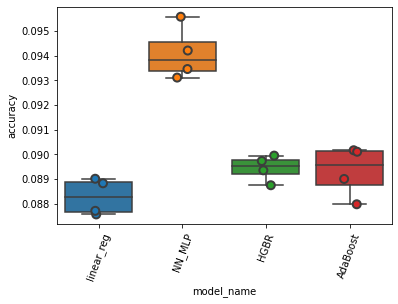

In [ ]:
# rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0,  criterion='mae')
linear_reg = LinearRegression() # normalize=True
# bagging = BaggingRegressor(KNeighborsRegressor(), max_samples=0.8, max_features=0.8)
NN_MLP = MLPRegressor(hidden_layer_sizes=(3,3), random_state=1, max_iter=500, alpha=1)
HGBR = HistGradientBoostingRegressor(loss='least_absolute_deviation', max_iter=300)
AdaBoost = AdaBoostRegressor()
# SVRModel = SVR()
# KNR = KNeighborsRegressor()

models = {#'rf':rf,
          'linear_reg':linear_reg,
          # 'bagging':bagging,
          'NN_MLP':NN_MLP,
          'HGBR':HGBR,
          'AdaBoost':AdaBoost,
          # 'SVR':SVRModel
          # 'KNR':KNR
          }

epochs = 4
cv_df = pd.DataFrame(index=range(epochs * len(models)))

entries = []
for model_name, model in models.items():
  accuracies = []
  for i in range(epochs):
    # Random Split the Dataset
    train_set, validation_set, y_train_price, y_validation_price = split_dataset()

    accuracies.append(mean_absolute_error(y_validation_price.values, model.fit(train_set, y_train_price).predict(validation_set)))
  for index, accuracy in enumerate(accuracies):
    entries.append((model_name, index, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'index', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=70)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=True)

model_name
linear_reg    0.088281
AdaBoost      0.089315
HGBR          0.089447
NN_MLP        0.094089
Name: accuracy, dtype: float64

In [ ]:
# Checkpoint
'''
linear_reg = LinearRegression() # normalize=True
bagging = BaggingRegressor(KNeighborsRegressor(), max_samples=0.85, max_features=0.85)
NN_MLP = MLPRegressor(hidden_layer_sizes=(20), random_state=1, max_iter=500, alpha=3)
HGBR = HistGradientBoostingRegressor(loss='least_absolute_deviation', max_iter=300)
AdaBoost = AdaBoostRegressor()

# Normalized and without 'stds'
RobustScaler(quantile_range=(15.0, 85.0))
NN_MLP        0.093030
linear_reg    0.093777
AdaBoost      0.094598
bagging       0.096495
HGBR          0.098579

# Full Dataset
NN_MLP        0.093626
rf            0.093660
linear_reg    0.094213
AdaBoost      0.094557
bagging       0.095183
HGBR          0.095507

# With Volume:
AdaBoost      0.093894
linear_reg    0.094001
NN_MLP        0.094058
rf            0.094459
bagging       0.095425
HGBR          0.096685

# With Correlation and P-value Selection (Removing ['n', 'p', 'z', 'c3', 'e2', 'g2', 'l1', 'l3'] columns)
minmax_vars = ['f', 'x', 'y', 'a1', 'a3', 'b1', 'b3', 'c1', 'c3', 'g1', 'e1']
RobustScaler(quantile_range=(10.0, 80.0))
linear_reg    0.093039
AdaBoost      0.093736
NN_MLP        0.094150
HGBR          0.095308
bagging       0.097056
'''

# (Testes) Adapting the Test_set

In [ ]:
df_test['volume'] = df_test['n'] / (df_test['x'] * df_test['y'] * pow(df_test['z'],2))
df_test['agressividade'] = df_test['f'] + df_test['g1']

df_test['d1_trans'] = df_test['a1'] + df_test['a3']
df_test['d2_trans'] = df_test['b1'] + df_test['b3']
df_test['d3_trans'] = df_test['c1'] + df_test['c3']
df_test['d4_trans'] = df_test['l1'] + df_test['l3']

df_test['d1_price'] = (df_test['a1'] + df_test['a3']) / (df_test['e2'] + df_test['e1'])
df_test['d2_price'] = df_test['b1'] * df_test['b3']
df_test['d3_price'] = df_test['c1'] * df_test['c3']
df_test['d4_price'] = df_test['l1'] - df_test['l3']
df_test['d5_price'] = df_test['e2'] + df_test['e1']

df_test

,id,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,random,volume,agressividade,d1_trans,d2_trans,d3_trans,d4_trans,d1_price,d2_price,d3_price,d4_price,d5_price
0,1,558,0.5,0.2,28,21,2,1.0,0.29,1.3,0.21,3.7,0.25,2.5,0.21,4.2,0.30,3.1,0.27,0.198,1.8,0.149,2.0,0.078,1.7,0.5,2.9,0.464016,0.237245,0.398,2.3,6.2,7.3,0.227,0.676471,9.25,13.02,0.071,3.4
1,2,910,0.9,0.3,28,19,9,2.2,0.14,1.6,0.14,4.7,0.12,4.9,0.11,4.9,0.22,2.2,0.16,0.172,1.0,0.086,0.8,0.030,0.8,0.2,1.6,0.931405,0.021118,0.472,3.8,9.6,7.1,0.116,2.111111,23.03,10.78,0.056,1.8
2,3,213,0.8,0.5,21,15,8,2.2,0.22,2.6,0.15,3.1,0.16,4.9,0.24,3.4,0.16,1.6,0.20,0.083,0.7,0.019,1.4,0.016,1.2,2.6,2.4,3.039636,0.010565,0.583,4.8,8.0,5.0,0.035,0.960000,15.19,5.44,0.003,5.0
3,4,654,0.7,0.5,14,15,2,2.2,0.12,3.8,0.27,3.7,0.26,1.9,0.14,2.3,0.29,4.1,0.11,0.185,1.3,0.110,0.8,0.006,1.7,0.2,1.7,3.118019,0.778571,0.685,6.0,5.6,6.4,0.116,3.157895,7.03,9.43,0.104,1.9
4,5,672,0.7,0.5,24,10,5,3.7,0.20,3.7,0.18,2.0,0.29,2.8,0.25,3.5,0.28,2.6,0.27,0.158,0.9,0.148,1.9,0.038,1.3,1.1,2.8,4.726961,0.112000,0.658,7.4,4.8,6.1,0.186,1.897436,5.60,9.10,0.110,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8054,8055,778,0.7,0.2,16,12,3,1.4,0.15,1.8,0.22,1.9,0.16,3.0,0.19,3.6,0.13,3.7,0.23,0.120,0.7,0.184,1.0,0.030,1.2,0.8,1.9,8052.325055,0.450231,0.320,3.2,4.9,7.3,0.214,1.185185,5.70,13.32,0.154,2.7
8055,8056,704,0.7,0.2,27,13,1,3.4,0.12,2.0,0.15,2.9,0.20,2.8,0.13,4.0,0.15,2.7,0.20,0.178,1.7,0.185,0.6,0.065,0.7,0.9,1.7,8053.865862,2.005698,0.378,5.4,5.7,6.7,0.250,2.076923,8.12,10.80,0.120,2.6
8056,8057,754,0.8,0.4,18,22,2,4.1,0.28,3.4,0.22,4.9,0.29,3.9,0.19,3.1,0.10,5.0,0.19,0.136,0.9,0.032,0.6,0.012,1.4,3.0,1.1,8057.833335,0.476010,0.536,7.5,8.8,8.1,0.044,1.829268,19.11,15.50,0.020,4.1
8057,8058,204,0.8,0.4,27,26,9,2.0,0.13,3.7,0.25,2.1,0.18,2.3,0.20,2.3,0.21,4.4,0.23,0.122,1.8,0.055,0.9,0.080,1.5,2.9,0.4,8058.502965,0.003588,0.522,5.7,4.4,6.7,0.135,1.727273,4.83,10.12,-0.025,3.3


In [ ]:
test_minmax = df_test[minmax_vars]
test_minmax

,p,volume,agressividade,d1_trans,d2_trans,d4_price
0,0.5,0.237245,0.398,2.3,6.2,0.071
1,0.9,0.021118,0.472,3.8,9.6,0.056
2,0.8,0.010565,0.583,4.8,8.0,0.003
3,0.7,0.778571,0.685,6.0,5.6,0.104
4,0.7,0.112000,0.658,7.4,4.8,0.110
...,...,...,...,...,...,...
8054,0.7,0.450231,0.320,3.2,4.9,0.154
8055,0.7,2.005698,0.378,5.4,5.7,0.120
8056,0.8,0.476010,0.536,7.5,8.8,0.020
8057,0.8,0.003588,0.522,5.7,4.4,-0.025


# Adapting the Oficial Test_set

In [15]:
from numpy import random

test_1 = random.uniform(0, len(df_test), size=len(df_test))
test_1.sort()
df_test['random'] = test_1
df_test

,id,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,random
0,1,558,0.5,0.2,28,21,2,1.0,0.29,1.3,0.21,3.7,0.25,2.5,0.21,4.2,0.30,3.1,0.27,0.198,1.8,0.149,2.0,0.078,1.7,0.5,2.9,0.295090
1,2,910,0.9,0.3,28,19,9,2.2,0.14,1.6,0.14,4.7,0.12,4.9,0.11,4.9,0.22,2.2,0.16,0.172,1.0,0.086,0.8,0.030,0.8,0.2,1.6,1.067521
2,3,213,0.8,0.5,21,15,8,2.2,0.22,2.6,0.15,3.1,0.16,4.9,0.24,3.4,0.16,1.6,0.20,0.083,0.7,0.019,1.4,0.016,1.2,2.6,2.4,2.341988
3,4,654,0.7,0.5,14,15,2,2.2,0.12,3.8,0.27,3.7,0.26,1.9,0.14,2.3,0.29,4.1,0.11,0.185,1.3,0.110,0.8,0.006,1.7,0.2,1.7,3.117041
4,5,672,0.7,0.5,24,10,5,3.7,0.20,3.7,0.18,2.0,0.29,2.8,0.25,3.5,0.28,2.6,0.27,0.158,0.9,0.148,1.9,0.038,1.3,1.1,2.8,3.701710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8054,8055,778,0.7,0.2,16,12,3,1.4,0.15,1.8,0.22,1.9,0.16,3.0,0.19,3.6,0.13,3.7,0.23,0.120,0.7,0.184,1.0,0.030,1.2,0.8,1.9,8056.626565
8055,8056,704,0.7,0.2,27,13,1,3.4,0.12,2.0,0.15,2.9,0.20,2.8,0.13,4.0,0.15,2.7,0.20,0.178,1.7,0.185,0.6,0.065,0.7,0.9,1.7,8057.231246
8056,8057,754,0.8,0.4,18,22,2,4.1,0.28,3.4,0.22,4.9,0.29,3.9,0.19,3.1,0.10,5.0,0.19,0.136,0.9,0.032,0.6,0.012,1.4,3.0,1.1,8057.363952
8057,8058,204,0.8,0.4,27,26,9,2.0,0.13,3.7,0.25,2.1,0.18,2.3,0.20,2.3,0.21,4.4,0.23,0.122,1.8,0.055,0.9,0.080,1.5,2.9,0.4,8057.433927


In [16]:
test_minmax = df_test[minmax_vars_random]
test_minmax

,random
0,0.295090
1,1.067521
2,2.341988
3,3.117041
4,3.701710
...,...
8054,8056.626565
8055,8057.231246
8056,8057.363952
8057,8057.433927


# Creating the Submit.csv

In [17]:
predict_test_price = result_price.predict(test_minmax)
predict_test_trans = result_trans.predict(test_minmax)

output_price = []
output_trans = []

for i in range(len(test_minmax)):
    output_price.append(predict_test_price[i])
    output_trans.append(predict_test_trans[i])

output = {'cent_price_cor': output_price, 'cent_trans_cor': output_trans}
output = pd.DataFrame.from_dict(output)
output

,cent_price_cor,cent_trans_cor
0,-0.146368,0.315007
1,-0.146375,0.315013
2,-0.146387,0.315023
3,-0.146394,0.315030
4,-0.146399,0.315034
...,...,...
8054,-0.221296,0.378972
8055,-0.221302,0.378977
8056,-0.221303,0.378978
8057,-0.221304,0.378978


In [18]:
output.to_csv('submit.csv', index=False)